In [1]:
import os
import json

import numpy as np
import torch
import torchvision
from torchsummary import summary

from project_18408.datasets import *
from project_18408.evaluation import *
from project_18408.experiments import *
from project_18408.utils import *

In [2]:
print("PyTorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)
# Detect if we have a GPU available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using the GPU!")
else:
    print("WARNING: Could not find GPU! Using CPU only")

PyTorch Version: 1.8.0
Torchvision Version: 0.9.0
Using the GPU!


In [3]:
data_dir = get_rel_pkg_path("dataset/")
experiment_dir = get_rel_pkg_path("experiments/")

In [4]:
manager = ExperimentManager(data_dir, experiment_dir)

In [5]:
configs_fname = "experiment_configs_mnist_test1.json"

In [6]:
with open(configs_fname, 'r') as f:
    configs = json.load(f)
configs = [ExperimentConfig.from_dict(c) for c in configs]

In [7]:
def get_weight_norm_prod(model):
    prod = 1
    for layer in model.layers:
        if isinstance(layer, nn.Linear):
            v = layer.weight.norm().item()
            prod *= v
    return prod

In [8]:
results = {}

for c in configs:
    h = manager.find_experiment(c)
    if not h:
        continue
    setup, state = manager.load_experiment(c, device)
    if not state.training_complete:
        continue
    dataloaders = setup['data_setup']['dataloaders']
    model = setup['model']
    criterion = setup['training_setup']['criterion']
    train_stats = get_dataloader_stats(dataloaders['train'], model, criterion, device)
    test_stats = get_dataloader_stats(dataloaders['test'], model, criterion, device)
    
    w_norm_prod = get_weight_norm_prod(model)
    
    outputs = test_stats['outputs']
    labels = test_stats['labels']
    mask = np.tile(np.arange(outputs.shape[1]), (outputs.shape[0], 1))
    mask = mask != labels.reshape(-1, 1)
    f_x_y = outputs[np.arange(outputs.shape[0]), labels]
    max_incorrect = outputs[mask].reshape((outputs.shape[0], outputs.shape[1] - 1)).max(axis=1)
    margins = f_x_y - max_incorrect
    
    depth = len(c.model_config.config.layer_dims) + 1
    
    if test_stats['acc'] < 0.9:
        print("WARNING: LOW ACCURACY")
        print(c)

    stats = {
        "config": c,
        "train_acc": train_stats['acc'],
        "test_acc": test_stats['acc'],
        "gen_error": train_stats['acc'] - test_stats['acc'],
        "weight_norm_prod": w_norm_prod,
        "margins": margins,
        "depth": depth
    }
    
    results[h] = stats


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\4b6c6784241787e3\sessions\Session 05-19-2021 06-09-16 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\ebfbe283f1c8a1c5\sessions\Session 05-19-2021 06-14-52 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\b6f6c04b88dbe847\sessions\Session 05-19-2021 06-18-06 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\3ca7bdc1d14d477d\sessions\Session 05-19-2021 06-25-11 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\9d28940fd6a00f91\sessions\Session 05-19-2021 06-30-53 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\a649a288db75857c\sessions\Session 05-19-2021 06-36-36 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\69331838767d877b\sessions\Session 05-19-2021 06-41-19 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\221dffeaa4777191\sessions\Session 05-19-2021 06-45-48 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\c4006ecb1f07900d\sessions\Session 05-19-2021 06-50-32 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\5652a57e55ed40cb\sessions\Session 05-19-2021 06-53-26 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\ecfd2fee24c632e0\sessions\Session 05-19-2021 06-56-46 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\2cebe7a02ae39957\sessions\Session 05-19-2021 07-00-28 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\5d8b1b90e92ada4f\sessions\Session 05-19-2021 07-05-10 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\0d3e694058efc299\sessions\Session 05-19-2021 07-09-12 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\098b63005c483dff\sessions\Session 05-19-2021 07-12-35 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\738e48f13def3deb\sessions\Session 05-19-2021 07-16-47 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\79799825e36494fd\sessions\Session 05-19-2021 07-22-28 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\6287f27c576a64c6\sessions\Session 05-19-2021 07-29-06 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\a9fe1221369e95e2\sessions\Session 05-19-2021 07-38-07 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 20000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.0, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\f1ae11a37ecad2d1\sessions\Session 05-19-2021 07-47-08 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 20000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 1e-05, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\060dc04137047276\sessions\Session 05-19-2021 07-55-59 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 20000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.0001, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\4b9a81c09c53f354\sessions\Session 05-19-2021 08-05-14 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 20000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.0, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\afda79e07b04c26b\sessions\Session 05-19-2021 08-14-29 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 20000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 1e-05, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\39ec45a7b72c678b\sessions\Session 05-19-2021 08-23-55 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 20000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.0001, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\d609f383b787128b\sessions\Session 05-19-2021 08-27-10 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\46d656a3349ba4cc\sessions\Session 05-19-2021 08-31-07 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\05f08f53ae15facf\sessions\Session 05-19-2021 08-33-33 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\8a37370ce766364e\sessions\Session 05-19-2021 08-39-17 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\01e713a6d8d74caf\sessions\Session 05-19-2021 08-44-52 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\1cc8a4f8ddb9a499\sessions\Session 05-19-2021 08-50-25 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\8ebcdb83da58a1c3\sessions\Session 05-19-2021 08-54-15 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\74fbd53d4a49fab4\sessions\Session 05-19-2021 08-57-58 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\793404c4d531527b\sessions\Session 05-19-2021 09-02-31 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\34cc1ead4e57871d\sessions\Session 05-19-2021 09-06-25 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\a07fe3ca6e91bc44\sessions\Session 05-19-2021 09-10-08 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\e9feb71c6f8c9d6a\sessions\Session 05-19-2021 09-12-46 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\00735f5d9110046e\sessions\Session 05-19-2021 09-16-09 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\57c7d6a92fff5310\sessions\Session 05-19-2021 09-18-55 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\76d665e4a4e86dbc\sessions\Session 05-19-2021 09-22-51 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\127fd2c2f4253664\sessions\Session 05-19-2021 09-27-36 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\c9a06a0e942d52b6\sessions\Session 05-19-2021 09-33-16 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\8fad0252b56f63b7\sessions\Session 05-19-2021 09-41-31 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\ef4b6e8331f24b34\sessions\Session 05-19-2021 09-50-20 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 40000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.0, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\7fea66806d362118\sessions\Session 05-19-2021 09-59-25 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 40000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 1e-05, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\ca81e805f831fd0a\sessions\Session 05-19-2021 10-08-28 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 40000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.0001, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\3871de3a98025206\sessions\Session 05-19-2021 10-17-50 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 40000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.0, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\3745d9cbfb16c236\sessions\Session 05-19-2021 10-26-46 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 40000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 1e-05, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\ebc2c06a0babfa18\sessions\Session 05-19-2021 10-36-18 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 40000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.0001, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\4f7dc8e9503b84f2\sessions\Session 05-19-2021 10-39-49 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\a721c4c3397177e2\sessions\Session 05-19-2021 10-42-06 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\b993973fb07e26a4\sessions\Session 05-19-2021 10-46-06 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\6bb3c1bb86d7f927\sessions\Session 05-19-2021 10-50-26 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\c0c64d160de80dec\sessions\Session 05-19-2021 10-54-48 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\cca603e87b3a9f45\sessions\Session 05-19-2021 10-59-09 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\d4fdd357531f464e\sessions\Session 05-19-2021 11-03-12 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\61ea71e38bdf44c2\sessions\Session 05-19-2021 11-07-46 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\8d9223f827abc533\sessions\Session 05-19-2021 11-13-10 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\9e5f6cc9bd721d41\sessions\Session 05-19-2021 11-16-12 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\945bddc2256f5667\sessions\Session 05-19-2021 11-20-02 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\6b63a7c0ac1510ce\sessions\Session 05-19-2021 11-22-48 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\a899c0ffbf97edac\sessions\Session 05-19-2021 11-29-49 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\04af4ddd1cc4ec53\sessions\Session 05-19-2021 11-35-07 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\71cea6a8c412cb8e\sessions\Session 05-19-2021 11-38-44 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\75bfbc08b0f55287\sessions\Session 05-19-2021 11-45-24 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\6afe056328491a3f\sessions\Session 05-19-2021 11-51-08 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\4186df706c751343\sessions\Session 05-19-2021 11-56-42 AM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\5fe747157701df64\sessions\Session 05-19-2021 12-05-44 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\034e7cb89b8e06ee\sessions\Session 05-19-2021 12-14-43 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 1e-05, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\959257b1acc8cf3e\sessions\Session 05-19-2021 12-23-57 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.0001, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\e114c7c77e8fd315\sessions\Session 05-19-2021 12-32-58 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.0, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\f1966da3f624cf06\sessions\Session 05-19-2021 12-42-28 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 1e-05, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\38a65dec663d6531\sessions\Session 05-19-2021 12-51-50 PM


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 31.14it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.0001, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}


In [9]:
print(stats)

{'config': {'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': False, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.0001, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}, 'train_acc': 0.11236666666666667, 'test_acc': 0.1135, 'gen_error': -0.0011333333333333334, 'weight_norm_prod': 2288664012.058258, 'margins': array([-0.10354878, -0.13911672,  0.10354802, ..., -0.14755322,
       -0.

In [44]:
def invalid_run(r):
    return r['test_acc'] < 0.9 or r['depth'] > 10

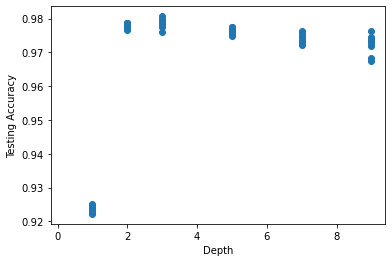

In [102]:
depths = []
test_accs = []

for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['depth'])
    test_accs.append(r['test_acc'])
    
plt.xlabel('Depth')
plt.ylabel('Testing Accuracy')
plt.scatter(depths, test_accs)
plt.xlim(left=-0.2)
plt.show()

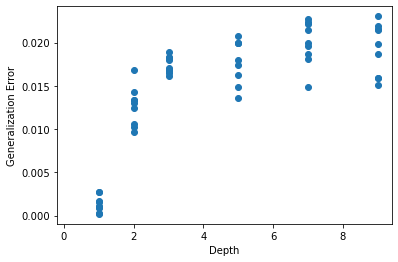

In [100]:
depths = []
gen_errs = []

for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['depth'])
    gen_errs.append(abs(r['gen_error']))
    
plt.xlabel('Depth')
plt.ylabel('Generalization Error')
plt.scatter(depths, gen_errs)
plt.xlim(left=-0.2)
plt.show()

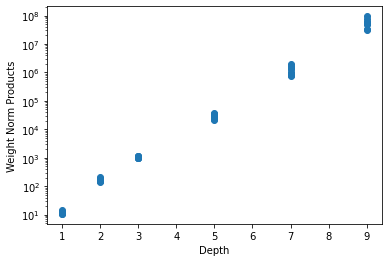

In [101]:
depths = []
w_norm_prods = []

for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['depth']) #r['config'].training_config.weight_decay)
    w_norm_prods.append(r['weight_norm_prod'])
    
plt.xlabel('Depth')
plt.ylabel('Weight Norm Products')
plt.yscale('log')
plt.scatter(depths, w_norm_prods)
plt.show()

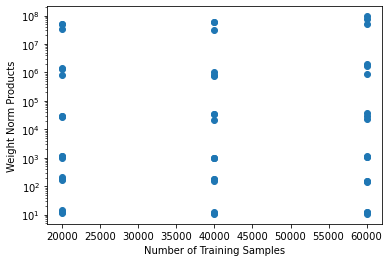

In [97]:
depths = []
w_norm_prods = []

for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['config'].dataset_config.config.num_train_samples)
    w_norm_prods.append(r['weight_norm_prod'])

plt.yscale('log')
plt.xlabel('Number of Training Samples')
plt.ylabel('Weight Norm Products')
plt.scatter(depths, w_norm_prods)
plt.show()

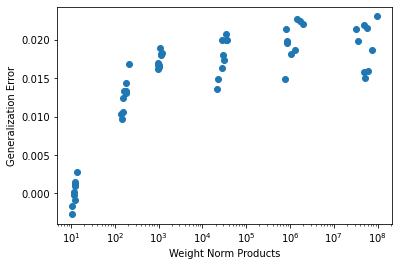

In [65]:
w_norm_prods = []
gen_errs = []

for h, r in results.items():
    if invalid_run(r):
        continue
    w_norm_prods.append(r['weight_norm_prod'])
    gen_errs.append(r['gen_error'])

plt.xscale('log')
plt.xlabel('Weight Norm Products')
plt.ylabel('Generalization Error')
plt.scatter(w_norm_prods, gen_errs)
plt.show()

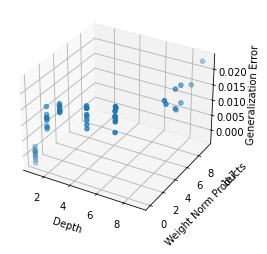

In [48]:
depths = []
gen_errs = []
w_norm_prods = []

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['depth'])
    gen_errs.append(r['gen_error'])
    w_norm_prods.append(r['weight_norm_prod'])
ax.set_xlabel('Depth')
ax.set_ylabel('Weight Norm Products')
ax.set_zlabel('Generalization Error')
#plt.xlim(left=-0.2)
ax.scatter(depths, w_norm_prods, gen_errs, marker='o')
plt.show()